In [6]:
from pyscf import scf,gto
import basis_set_exchange as bse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
a2c={1:"y",6:"k",7:"b",8:"r"}

In [92]:
%load_ext autoreload
%autoreload 2
sys.path.append("../Alchemical_CPKS_perturbator")
from FcMole import *
from AP_class import APDFT_perturbator as AP
from AP_utils import DeltaV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
basis_pcx2={"H":"pc-2",'C':bse.get_basis("pcX-2",fmt="nwchem",elements=[6])\
           ,'N':bse.get_basis("pcX-2",fmt="nwchem",elements=[7])\
           ,'O':bse.get_basis("pcX-2",fmt="nwchem",elements=[8])}

In [18]:
benz_atom="""
C         6.95191249e-13  2.61173060e+00 -1.67580194e-08 ;
H         2.83052087e-13  4.63941350e+00 -1.15976219e-08 ;
C         2.26182505e+00  1.30586530e+00 -2.37508246e-08 ;
H         4.01784995e+00  2.31970675e+00 -9.84687205e-09 ;
C         2.26182505e+00 -1.30586530e+00  8.26065094e-09 ;
H         4.01784995e+00 -2.31970675e+00  5.83890508e-08 ;
C        -8.45954456e-13 -2.61173060e+00 -1.55922267e-08 ;
H         1.49445304e-12 -4.63941350e+00 -3.26774154e-08 ;
C        -2.26182505e+00 -1.30586530e+00 -8.28266973e-09 ;
H        -4.01784995e+00 -2.31970675e+00  1.87236306e-09 ;
C        -2.26182505e+00  1.30586530e+00  1.68546675e-08 ;
H        -4.01784995e+00  2.31970675e+00  3.31289175e-08 ;
"""

In [142]:
mol_benz=gto.M(atom=benz_atom,basis=basis_pcx2,unit="au")
mf=scf.RKS(mol_benz)
mf.xc="PBE0"

In [143]:
mf.scf()

converged SCF energy = -232.052453253772


-232.05245325377206

In [144]:
C_idxs=[0,2,4,6,8,10]
benz_ap=AP(mf,sites=C_idxs )
benz_ap.build_all()

In [145]:
from itertools import permutations

In [146]:
# Neutral BN targets 
targs1=[ [1,-1,0,0,0,0],
        [1,0,-1,0,0,0],
        [1,0,0,-1,0,0]  
]
targs2=[ [1,1,-1,-1,0,0],
        [1,1,-1,0,-1,0],
        [1,1,-1,0,0,-1],
        [1,1,0,-1,-1,0],
        
        [1,-1,1,-1,0,0],
        [1,-1,1,0,-1,0],
        [1,0,1,-1,-1,0],
        [1,0,1,-1,0,-1],
        
        [1,-1,-1,1,0,0],
        [1,-1,0,1,-1,0],
        [1,-1,0,1,0,-1],
 
]
targs3=[ [1,1,1,-1,-1,-1],
        [1,1,-1,1,-1,-1],
        [1,-1,1,-1,1,-1]  
]

-235.44860928682115
-235.38998300018707
-235.39678341690762
-238.6756875086392
-238.73415538844893
-238.78206925637465
-238.6238619848303
-238.91019331092951
-238.8408553907928
-238.7344731001883
-238.85836778711845
-238.77660684484837
-238.83116351740398
-238.83507430250566
-241.96819204028384
-242.17549463087389
-242.43720647210552


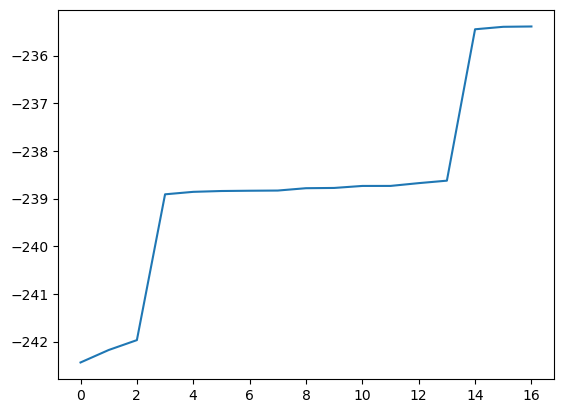

In [147]:
e2=[]
for t in targs1+targs2+targs3:
    print(benz_ap.APDFT3(t))
    e2.append(benz_ap.APDFT3(t))
plt.plot(np.sort(e2))

In [148]:
dir(mol_benz)

['_TemporaryMoleContext',
 '__add__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_suffix',
 '_atm',
 '_atom',
 '_bas',
 '_basis',
 '_build_symmetry',
 '_built',
 '_ctx_lock',
 '_ecp',
 '_ecpbas',
 '_enuc',
 '_env',
 '_keys',
 '_libcint_ctr_coeff',
 '_nao',
 '_nelectron',
 '_pseudo',
 '_symm_axes',
 '_symm_orig',
 'add_keys',
 'ao2mo',
 'ao_labels',
 'ao_loc',
 'ao_loc_2c',
 'ao_loc_nr',
 'ao_rotation_matrix',
 'aoslice_2c_by_atom',
 'aoslice_by_atom',
 'aoslice_nr_by_atom',
 'apply',
 'atom',
 'atom_charge',
 'atom_charges',
 'atom_coord',
 'atom_coords',
 'atom_mass_list',
 'atom_nelec_core',
 'atom_nshells',
 '

In [149]:
APDFT1={}
APDFT2={}
APDFT3={}
half_appr={}
target_energies={}
E0=mf.e_tot
E0_nuc=mf.energy_nuc()
print(E0)
for t in targs1+targs2+targs3:
    t=np.array(t)
    dV=DeltaV(mol_benz,[C_idxs,t])
    APDFT1[str(t)]=benz_ap.APDFT1(t)
    APDFT2[str(t)]=benz_ap.APDFT2(t)
    APDFT3[str(t)]=benz_ap.APDFT3(t)
    tm=FcM_like(mol_benz,fcs=[C_idxs,t ])
    t_scf=scf.RKS(tm )
    t_scf.xc="PBE0"
    target_energies[str(t)]=t_scf.scf(dm0=benz_ap.dP_pred(t))
    enuc_t=tm.energy_nuc()
    hm=FcM_like(mol_benz,fcs=[C_idxs,t/2 ])
    hm_scf=scf.RKS(hm)
    hm_scf.xc="PBE0"
    hm_scf.scf(dm0=benz_ap.dP_pred(t/2))
    half_appr[str(t)]=E0+np.einsum("ij,ij",hm_scf.make_rdm1(),dV)-E0_nuc+enuc_t

-232.05245325377206


/home/giorgio/anaconda3/lib/python3.8/site-packages/pyscf/gto/mole.py:1209: UserWarning: Function mol.dumps drops attribute charge because it is not JSON-serializable
  warnings.warn(msg)
/home/giorgio/anaconda3/lib/python3.8/site-packages/pyscf/gto/mole.py:1209: UserWarning: Function mol.dumps drops attribute with_rinv_at_nucleus because it is not JSON-serializable
  warnings.warn(msg)


converged SCF energy = -235.448361946318
converged SCF energy = -232.901483678745
converged SCF energy = -235.390779876942
converged SCF energy = -232.886883376021
converged SCF energy = -235.39857312693
converged SCF energy = -232.888666339886
converged SCF energy = -238.710030018134
converged SCF energy = -233.711047576094
converged SCF energy = -238.742217633847
converged SCF energy = -233.723568820668
converged SCF energy = -238.809561987091
converged SCF energy = -233.736781958336
converged SCF energy = -238.642114498807
converged SCF energy = -233.696678384025
converged SCF energy = -238.904962257095
converged SCF energy = -233.766554074907
converged SCF energy = -238.840097622394
converged SCF energy = -233.749103137711
converged SCF energy = -238.736578670676
converged SCF energy = -233.723197219692
converged SCF energy = -238.831555766684
converged SCF energy = -233.751895353333
converged SCF energy = -238.802226668143
converged SCF energy = -233.73593422587
converged SCF ener

In [150]:
np.einsum("i,j,k,ijk",t,t,[1,0,0,0,0,0],benz_ap.cubic_hessian)

-0.4047795745193848

In [151]:
df=pd.DataFrame()

In [152]:
df["APDFT1"]=pd.Series(APDFT1)
df["APDFT2"]=pd.Series(APDFT2)
df["APDFT3"]=pd.Series(APDFT3)
df["Target"]=pd.Series(target_energies)
df["Half aprrox"]=pd.Series(half_appr)
df

,APDFT1,APDFT2,APDFT3,Target,Half aprrox
[ 1 -1 0 0 0 0],-232.052453,-235.448609,-235.448609,-235.448362,-235.448532
[ 1 0 -1 0 0 0],-232.052453,-235.389983,-235.389983,-235.390780,-235.390379
[ 1 0 0 -1 0 0],-232.052453,-235.396783,-235.396783,-235.398573,-235.397790
[ 1 1 -1 -1 0 0],-232.052453,-238.675688,-238.675688,-238.710030,-238.696858
[ 1 1 -1 0 -1 0],-232.052453,-238.734315,-238.734155,-238.742218,-238.739123
[ 1 1 -1 0 0 -1],-232.052453,-238.779338,-238.782069,-238.809562,-238.798679
[ 1 1 0 -1 -1 0],-232.052453,-238.623862,-238.623862,-238.642114,-238.634464
[ 1 -1 1 -1 0 0],-232.052453,-238.910193,-238.910193,-238.904962,-238.907516
[ 1 -1 1 0 -1 0],-232.052453,-238.837965,-238.840855,-238.840098,-238.839566
[ 1 0 1 -1 -1 0],-232.052453,-238.734313,-238.734473,-238.736579,-238.736193


In [157]:
error=pd.DataFrame()
error["APDFT1"] =(df["APDFT1"]-df.Target)*1000
error["APDFT2"] =(df["APDFT2"]-df.Target)*1000
error["APDFT3"] =(df["APDFT3"]-df.Target)*1000
error["Half aprrox"] =(df["Half aprrox"]-df.Target)*1000

In [158]:
#df.to_pickle("BNdopedBenzene.pkl")

In [160]:
error.to_pickle("BNdopedBenzene_error.pkl")

In [161]:
error

,APDFT1,APDFT2,APDFT3,Half aprrox
[ 1 -1 0 0 0 0],3395.908867,-0.247369,-0.247341,-0.169905
[ 1 0 -1 0 0 0],3338.326798,0.797012,0.796877,0.400997
[ 1 0 0 -1 0 0],3346.119873,1.789710,1.789710,0.783482
[ 1 1 -1 -1 0 0],6657.576764,34.342510,34.342509,13.171668
[ 1 1 -1 0 -1 0],6689.764555,7.902593,8.062245,3.095089
[ 1 1 -1 0 0 -1],6757.108908,30.223763,27.492731,10.883024
[ 1 1 0 -1 -1 0],6589.661245,18.252514,18.252514,7.650666
[ 1 -1 1 -1 0 0],6852.509003,-5.231054,-5.231054,-2.553686
[ 1 -1 1 0 -1 0],6787.644543,2.132948,-0.757768,0.531986
[ 1 0 1 -1 -1 0],6684.125417,2.265418,2.105570,0.386102
